# Topic Modeling on airline tweets

## Topic Modeling - Attempt #1 (All Text)

# A random selection of topics

In [5]:
import pandas as pd
df_airlines = pd.read_csv("airline-tweets.csv") 
df_airlines.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
import nltk
import re
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline  


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mausoto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mausoto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/mausoto/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [7]:
def clean_text_1(text):
    # Lowercase
    text = text.lower()
    # Remove email addresses
    text = re.sub('\S*\@\S*', '', text)    
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove numbers
    text = re.sub('\d', '', text)    
    # Remove quotes
    text = re.sub('[‘’“”…]', '', text)
    # Remove new line \n 
    text = re.sub('\n', ' ', text)
    # Remove stop_word
    stop_words = stopwords.words('english')
    words = word_tokenize(text)
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

wnl = WordNetLemmatizer()

def lemmatize(text):
    wnl = WordNetLemmatizer()
    lemma=[]
    for i in word_tokenize(text):
#        if len(i) > 3:
        lemma.append(wnl.lemmatize(i))    
    return ' '.join(lemma)

def lemmatize_tag(text):
    lemma=[]
    for i,j in pos_tag(word_tokenize(text)) :
        p=j[0].lower()
        if p in ['j','n','v']:
            if p == 'j':
                p = 'a'
            lemma.append(wnl.lemmatize(i,p))
        else :
            lemma.append(wnl.lemmatize(i))    
    return ' '.join(lemma)


In [8]:
# Let's select negative reviews

df_airlines=df_airlines[df_airlines['airline_sentiment']=='negative']

df_airlines['text_1'] = pd.DataFrame(df_airlines.text.apply(clean_text_1))
df_airlines['text_2'] = pd.DataFrame(df_airlines.text_1.apply(lemmatize))

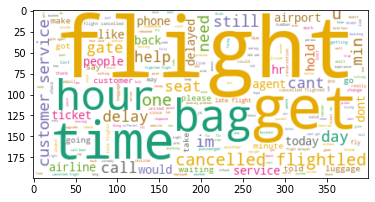

In [9]:
stop_words = stopwords.words('english')
stop_words2=[]

for w in stop_words:
    stop_words2.append(w)

stop_words2.extend(['amp','plane'])

data_clean=df_airlines[['text_2']]

alltext=''
for index,row in data_clean.iterrows():
    alltext=alltext+row.text_2

wc = WordCloud(collocations=True,stopwords=stop_words2, background_color="white", colormap="Dark2",
               max_font_size=100, random_state=42)

wc.generate(alltext)
plt.imshow(wc, interpolation="bilinear")

plt.show()


## LSA



In [319]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=stop_words2, ngram_range=(1, 2))
data_cv = cv.fit_transform(data_clean.text_2)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aa,aa abidfw,aa account,aa agent,aa airplane,aa airway,aa also,aa around,aa automated,aa avoided,...,zoom sauce,zoom scroll,zrh,zrh departed,zukes,zukes nonvegan,zurich,zurich bc,zurich jfk,zurich would
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14631,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14634,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [323]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=stop_words2, ngram_range=(1,1),min_df=3)#, max_df=.98)
tfidf = vectorizer.fit_transform(data_clean.text_2)
len(vectorizer.get_feature_names())

2863

In [324]:
data_tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())
data_tfidf.index = data_clean.index
data_tfidf

,aa,aadvantage,abc,ability,able,absolute,absolutely,absurd,abt,abysmal,...,young,youre,yousuck,youve,yr,yuma,yyz,zero,zone,zurich
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [325]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=10)

svd_model.fit(data_tfidf)

print(svd_model.components_.shape)
print(svd_model.singular_values_)


(10, 2863)
[13.2980938   8.84182615  8.11929084  7.59202708  7.44428781  6.59972156
  6.58218007  6.48447524  6.29051567  6.15082998]


In [326]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print("%.2f*%s "% (t[1], t[0]) ,end='')
    print("")

Topic 0: 
0.54*flight 0.27*cancelled 0.24*hour 0.19*get 0.18*hold 0.17*flightled 0.14*help 
Topic 1: 
0.42*service 0.42*customer 0.15*hold 0.14*hour 0.12*call 0.11*worst 0.09*bag 
Topic 2: 
0.47*hour 0.39*hold 0.14*minute 0.12*waiting 0.10*help 0.09*still 0.09*get 
Topic 3: 
0.41*hold 0.37*cancelled 0.29*flightled 0.22*customer 0.22*service 0.21*hour 0.12*flighted 
Topic 4: 
0.45*get 0.26*help 0.23*cant 0.22*call 0.15*cancelled 0.15*phone 0.15*need 
Topic 5: 
0.51*get 0.21*hour 0.16*customer 0.16*service 0.15*delayed 0.14*flight 0.12*cant 
Topic 6: 
0.30*airline 0.28*worst 0.26*time 0.24*ever 0.19*get 0.18*delayed 0.13*never 
Topic 7: 
0.36*bag 0.34*hour 0.27*get 0.21*cancelled 0.20*airline 0.19*flightled 0.18*worst 
Topic 8: 
0.45*help 0.32*bag 0.23*need 0.19*please 0.16*flight 0.12*delayed 0.10*hold 
Topic 9: 
0.47*call 0.26*back 0.25*hour 0.17*late 0.16*im 0.11*flightr 0.11*one 


## LDA

In [331]:
from sklearn.feature_extraction.text import CountVectorizer

stop_words2.extend(['flight'])

cv = CountVectorizer(stop_words=stop_words2, ngram_range=(1,1),min_df=3)#, max_df=.9)
data_cv = cv.fit_transform(data_clean.text_2)
data = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data.index = data_clean.index
data

,aa,aadvantage,abc,ability,able,absolute,absolutely,absurd,abt,abysmal,...,young,youre,yousuck,youve,yr,yuma,yyz,zero,zone,zurich
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14631,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14634,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [332]:
# Install the package in the current Jupyter kernel

import sys
!pip install gensim

OSError: [Errno 12] Cannot allocate memory

In [13]:
from gensim import matutils, models
import scipy.sparse

In [334]:
tdm = data.transpose()
tdm.head()

,3,4,5,15,17,20,24,25,26,28,...,14622,14624,14626,14627,14629,14631,14633,14634,14636,14638
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aadvantage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [335]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [336]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [337]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=6)
lda.print_topics()

[(0,
  '0.041*"hour" + 0.019*"gate" + 0.018*"waiting" + 0.013*"still" + 0.012*"dont" + 0.012*"agent" + 0.011*"hold" + 0.011*"get" + 0.010*"late" + 0.010*"sitting"'),
 (1,
  '0.026*"customer" + 0.025*"service" + 0.022*"help" + 0.018*"get" + 0.017*"cant" + 0.014*"dfw" + 0.014*"call" + 0.012*"please" + 0.011*"agent" + 0.009*"phone"'),
 (2,
  '0.035*"call" + 0.017*"hold" + 0.016*"hour" + 0.016*"get" + 0.013*"back" + 0.013*"wait" + 0.012*"customer" + 0.012*"service" + 0.012*"weather" + 0.011*"time"'),
 (3,
  '0.026*"time" + 0.017*"worst" + 0.016*"ever" + 0.015*"airline" + 0.012*"im" + 0.012*"service" + 0.011*"customer" + 0.011*"one" + 0.010*"ive" + 0.008*"phone"'),
 (4,
  '0.038*"cancelled" + 0.025*"get" + 0.020*"flightled" + 0.013*"change" + 0.013*"day" + 0.012*"hold" + 0.012*"aa" + 0.011*"hour" + 0.010*"hr" + 0.010*"one"'),
 (5,
  '0.029*"cancelled" + 0.021*"aa" + 0.019*"bag" + 0.015*"flightled" + 0.013*"hour" + 0.013*"need" + 0.010*"get" + 0.009*"seat" + 0.009*"time" + 0.008*"help"')]

## Topic Modeling - Nouns Only

In [338]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [339]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_clean.text_2.apply(nouns))
data_nouns

,text_2
3,blast entertainment face amp recourse
4,thing
5,flight seat didnt thing va
15,sfopdx schedule
17,nyc sfo week seat gentleman side help
...,...
14631,thx nothing country plane come one
14633,flight leaving tomorrow morning auto night fli...
14634,cue delays👌
14636,minute flight communication minute flight that...


In [17]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

stop_words = text.ENGLISH_STOP_WORDS.union(stop_words2)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words, min_df=2)#, min_df=.1, max_df=.9)
data_cvn = cvn.fit_transform(data_nouns.text_2)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

NameError: name 'data_nouns' is not defined

In [341]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [349]:
# Let's start with  topics
ldan = models.LdaModel(corpus=corpusn, num_topics=10, id2word=id2wordn,passes=50)
ldan.print_topics()

[(0,
  '0.083*"seat" + 0.078*"dont" + 0.039*"problem" + 0.035*"bag" + 0.033*"didnt" + 0.022*"option" + 0.022*"year" + 0.021*"info" + 0.021*"flt" + 0.020*"crew"'),
 (1,
  '0.068*"thanks" + 0.061*"luggage" + 0.047*"hour" + 0.043*"reservation" + 0.035*"book" + 0.032*"phone" + 0.027*"day" + 0.019*"site" + 0.019*"online" + 0.019*"team"'),
 (2,
  '0.063*"issue" + 0.060*"weather" + 0.051*"today" + 0.034*"jfk" + 0.034*"airport" + 0.029*"air" + 0.028*"thing" + 0.027*"answer" + 0.026*"pay" + 0.021*"use"'),
 (3,
  '0.178*"customer" + 0.175*"service" + 0.045*"agent" + 0.034*"line" + 0.030*"response" + 0.026*"care" + 0.020*"person" + 0.020*"phone" + 0.017*"rude" + 0.016*"help"'),
 (4,
  '0.108*"im" + 0.038*"week" + 0.037*"night" + 0.024*"whats" + 0.023*"business" + 0.018*"message" + 0.017*"website" + 0.016*"havent" + 0.016*"dca" + 0.015*"employee"'),
 (5,
  '0.135*"hour" + 0.064*"delay" + 0.049*"gate" + 0.048*"minute" + 0.036*"hold" + 0.034*"aa" + 0.028*"agent" + 0.028*"connection" + 0.028*"hr" + 0

## Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [350]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [345]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.text_2.apply(nouns_adj))
data_nouns_adj

,text_2
3,aggressive blast obnoxious entertainment guest...
4,big bad thing
5,flight seat didnt bad thing va
15,sfopdx schedule
17,flew nyc sfo last week sit seat due large gent...
...,...
14631,thx nothing u country u plane come one
14633,flight flightled leaving tomorrow morning auto...
14634,cue delays👌
14636,minute late flight communication minute late f...


In [16]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words2, min_df=2)
data_cvna = cvna.fit_transform(data_nouns_adj.text_2)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

NameError: name 'CountVectorizer' is not defined

In [15]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

NameError: name 'data_dtmna' is not defined

In [348]:
ldan_2 = models.LdaModel(corpus=corpusna, num_topics=10, id2word=id2wordna, passes=50)

ldan_2.print_topics()

[(0,
  '0.089*"bag" + 0.038*"seat" + 0.034*"baggage" + 0.025*"people" + 0.022*"pm" + 0.020*"im" + 0.016*"check" + 0.014*"class" + 0.014*"claim" + 0.013*"attendant"'),
 (1,
  '0.176*"hour" + 0.035*"minute" + 0.030*"wait" + 0.025*"hold" + 0.024*"time" + 0.022*"delay" + 0.021*"ive" + 0.018*"someone" + 0.017*"problem" + 0.015*"help"'),
 (2,
  '0.039*"last" + 0.033*"time" + 0.033*"weather" + 0.031*"worst" + 0.028*"experience" + 0.026*"nothing" + 0.026*"airline" + 0.026*"dfw" + 0.025*"bad" + 0.024*"fly"'),
 (3,
  '0.057*"late" + 0.038*"email" + 0.033*"response" + 0.032*"flightr" + 0.027*"issue" + 0.017*"passenger" + 0.015*"dca" + 0.013*"wifi" + 0.012*"hr" + 0.012*"complaint"'),
 (4,
  '0.033*"ticket" + 0.023*"connection" + 0.021*"miss" + 0.018*"credit" + 0.017*"need" + 0.016*"please" + 0.015*"food" + 0.014*"site" + 0.013*"fee" + 0.013*"im"'),
 (5,
  '0.053*"flightled" + 0.040*"tomorrow" + 0.033*"airport" + 0.028*"today" + 0.025*"hotel" + 0.023*"book" + 0.023*"home" + 0.021*"day" + 0.020*"mor

In [1]:
from gensim.models import LdaModel

In [14]:
def compute_coherence_values_lda(doc_clean, stop, start=2, step=3):

    u_mass = []
    c_uci = []
    c_v = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LdaModel(corpus=corpusna, num_topics=num_topics, id2word=id2wordna, passes=50) # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='u_mass')
        u_mass.append(coherencemodel.get_coherence())
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_uci')
        c_uci.append(coherencemodel.get_coherence())
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        c_v.append(coherencemodel.get_coherence())
    return model_list, u_mass, c_uci, c_v

def plot_graph_lda(doc_clean, start, stop, step):
    
    model_list, u_mass, c_uci, c_v = compute_coherence_values_lda(doc_clean,
                                                            stop, start, step)
  
    # cv
    x = range(start, stop, step)
    fig = plt.plot(x, c_v, label = 'cv')
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(('cv'), loc='best')
    plt.xticks(ticks = x)
    plt.show()
    plt.close()

    # cuci
    x = range(start, stop, step)
    fig = plt.plot(x, c_uci, label = 'cuci')
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(('cuci'), loc='best')
    plt.xticks(ticks = x)
    plt.show()
    plt.close()


    # u_mass
    x = range(start, stop, step)
    fig = plt.plot(x, u_mass, label = 'umass')
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(('umass'), loc='best')
    plt.xticks(ticks = x)
    plt.show()
    plt.close()

    return model_list

model_list = plot_graph_lda(data_clean.text_2.apply(word_tokenize),1,20,1)

NameError: name 'corpusna' is not defined

## Identify Topics in Each Document

In [306]:
corpus_transformed = ldan_2[corpusna]


In [307]:
list(corpus_transformed)

[[(0, 0.0125026805),
  (1, 0.012506507),
  (2, 0.0125026805),
  (3, 0.0125026805),
  (4, 0.8874712),
  (5, 0.0125026805),
  (6, 0.0125026805),
  (7, 0.0125026805),
  (8, 0.012503518),
  (9, 0.0125026805)],
 [(0, 0.025000915),
  (1, 0.025000915),
  (2, 0.02501972),
  (3, 0.025014186),
  (4, 0.025000915),
  (5, 0.025004262),
  (6, 0.02500555),
  (7, 0.025000915),
  (8, 0.025004217),
  (9, 0.7749484)],
 [(0, 0.014290439),
  (1, 0.17172703),
  (2, 0.014295347),
  (3, 0.014293967),
  (4, 0.0142901335),
  (5, 0.014290684),
  (6, 0.014291666),
  (7, 0.01429115),
  (8, 0.01429386),
  (9, 0.71393573)],
 [(0, 0.05000258),
  (1, 0.05000258),
  (2, 0.05000258),
  (3, 0.05000258),
  (4, 0.05000258),
  (5, 0.05000258),
  (6, 0.05000258),
  (7, 0.05000258),
  (8, 0.05000258),
  (9, 0.5499768)],
 [(0, 0.10182381),
  (6, 0.23354256),
  (7, 0.076548055),
  (8, 0.08462624),
  (9, 0.46497875)],
 [(0, 0.014287235),
  (1, 0.16480571),
  (2, 0.33474803),
  (3, 0.014287129),
  (4, 0.014287006),
  (5, 0.014287

In [308]:
topic_prediction=[]
for j in list(corpus_transformed):
    main_topic=j[0][0]
    weigth=j[0][1]
    for t,w in j:
        if w > weigth :
            main_topic=t
            weigth=w
    topic_prediction.append(main_topic)


In [309]:
topic_prediction

[4,
 9,
 9,
 9,
 9,
 2,
 4,
 4,
 7,
 0,
 6,
 0,
 0,
 5,
 9,
 0,
 4,
 5,
 7,
 4,
 6,
 3,
 4,
 6,
 9,
 3,
 0,
 8,
 7,
 8,
 9,
 0,
 9,
 5,
 0,
 8,
 7,
 8,
 5,
 5,
 7,
 0,
 7,
 5,
 0,
 9,
 9,
 9,
 7,
 7,
 0,
 7,
 9,
 8,
 0,
 0,
 3,
 0,
 0,
 8,
 1,
 1,
 1,
 0,
 7,
 5,
 6,
 0,
 8,
 6,
 6,
 8,
 2,
 0,
 6,
 4,
 0,
 7,
 2,
 1,
 0,
 0,
 0,
 0,
 6,
 7,
 9,
 7,
 0,
 8,
 8,
 0,
 6,
 1,
 9,
 0,
 5,
 0,
 0,
 8,
 9,
 7,
 9,
 0,
 6,
 4,
 8,
 6,
 7,
 0,
 6,
 9,
 9,
 6,
 0,
 7,
 8,
 7,
 9,
 9,
 2,
 7,
 6,
 2,
 5,
 5,
 2,
 7,
 8,
 0,
 6,
 2,
 8,
 1,
 1,
 4,
 2,
 8,
 8,
 3,
 2,
 4,
 4,
 7,
 7,
 0,
 7,
 5,
 0,
 4,
 0,
 0,
 8,
 9,
 0,
 0,
 7,
 6,
 0,
 5,
 4,
 7,
 9,
 6,
 9,
 8,
 8,
 9,
 8,
 0,
 1,
 8,
 5,
 8,
 7,
 3,
 5,
 0,
 2,
 8,
 9,
 0,
 5,
 7,
 4,
 1,
 6,
 3,
 5,
 1,
 7,
 4,
 0,
 1,
 9,
 0,
 4,
 7,
 9,
 8,
 7,
 9,
 5,
 5,
 6,
 2,
 0,
 5,
 1,
 2,
 1,
 1,
 5,
 0,
 0,
 9,
 8,
 3,
 6,
 3,
 3,
 0,
 0,
 7,
 6,
 3,
 1,
 9,
 6,
 5,
 8,
 0,
 1,
 5,
 0,
 6,
 5,
 4,
 5,
 5,
 6,
 7,
 0,
 1,
 7,
 7,
 7,
 5,
 5,
 3,


In [310]:
df_airlines.negativereason

3                    Bad Flight
4                    Can't Tell
5                    Can't Tell
15                  Late Flight
17                   Bad Flight
                  ...          
14631                Bad Flight
14633          Cancelled Flight
14634               Late Flight
14636    Customer Service Issue
14638    Customer Service Issue
Name: negativereason, Length: 9178, dtype: object

In [311]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(df_airlines.negativereason))

print(le.classes_)


['Bad Flight' "Can't Tell" 'Cancelled Flight' 'Customer Service Issue'
 'Damaged Luggage' 'Flight Attendant Complaints' 'Flight Booking Problems'
 'Late Flight' 'Lost Luggage' 'longlines']


In [312]:
enc_negativereason=le.transform(list(df_airlines.negativereason))


In [313]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(enc_negativereason,topic_prediction)
print(cm)

[[ 36  61  52  29  71  33  39  87  42 130]
 [134  89 203 144  96  71 151 107  70 125]
 [258  94  36  24  42  29  30 161  34 139]
 [551 164 235 507 144 533 260 173 150 193]
 [  8   3   4   7   5  10  16   2  17   2]
 [ 36  63  24  47  29  62  49  86  34  51]
 [166  45  77  17  20  39  53  27  15  70]
 [146 259  69  46  81  75  91 447 223 228]
 [ 94  57  42  27  46  93  88  69 165  43]
 [ 12  25   2   8   7  44   2  18  40  20]]


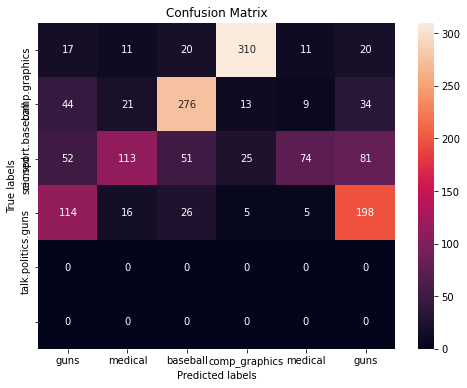

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt     

fig = plt.figure(figsize=(8, 6)) 
ax= plt.subplot()

sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.yaxis.set_ticklabels(['comp.graphics', 'rec.sport.baseball', 'sci.med', 'talk.politics.guns','',''])
ax.xaxis.set_ticklabels(['guns', 'medical', 'baseball', 'comp_graphics','medical','guns']);
